# GPT

Für die Analyse der Übersetzungsqualität wird wie bei BERT die semantische Ähnlichkeit mithilfe des Similarity Scores gemessen. Für das Embedding wird jedoch "text-embedding-ada-002" von Open AI herangezogen. Dies ist ein Modell, das speziell darauf trainiert wurde, Texte in numerische Vektoren (Embeddings) zu transformieren. Diese Embeddings repräsentieren den semantischen Inhalt eines Textes und ermöglichen es, die Bedeutung von Texten zu vergleichen und zu analysieren.

![GPT](https://cdn.openai.com/new-and-improved-embedding-model/draft-20221214a/vectors-2.svg)


### Vorteile:
- Einfache Implementierung: Der Code ist einfach und direkt. Er nutzt die OpenAI API und die cosine_similarity Funktion aus scikit-learn, um die semantische Ähnlichkeit zu berechnen.
- Flexibilität: Der Code ist leicht anpassbar und es können zusätzliche Textvorverarbeitungen verwendet werden.
- Genauigkeit: Die Verwendung von OpenAI's text-embedding-ada-002 Modell liefert hochwertige Embeddings, die eine präzise Berechnung der semantischen Ähnlichkeit ermöglichen.

### Nachteile:
- Kosten: Die Verwendung der OpenAI API ist kostenpflichtig. Je nach Nutzungshäufigkeit können die Kosten variieren.
- Abhängigkeit von externen Diensten: Der Code ist auf die Verfügbarkeit und Zuverlässigkeit der OpenAI API angewiesen. Wenn die API nicht verfügbar ist, funktioniert der Code nicht.
- Latenz: Das Abrufen von Embeddings über die API kann eine gewisse Latenz verursachen, insbesondere bei großen Textmengen.
- Begrenzte Anpassung: Obwohl der Code flexibel ist, könnte es schwierig sein, spezifische Anpassungen vorzunehmen, die über das hinausgehen, was die OpenAI API standardmäßig bietet.
- Datenschutz: Texte müssen an die OpenAI-Server gesendet werden, was Datenschutzbedenken hervorrufen könnte, insbesondere bei sensiblen Daten.



Quellen:
- https://openai.com/index/new-and-improved-embedding-model/
- https://docs.pinecone.io/models/text-embedding-ada-002
- https://platform.openai.com/docs/guides/embeddings
- https://github.com/openai/openai-python
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

In [2]:
# Similarity Score und Readability: GPT
import os
import json
import openai
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import textstat

# Auslesen der Umgebungsvariable (Definition des OPENAI Keys in einer Umgebungsvariable)

meine_variable = os.getenv('OPENAI_KEY')

if meine_variable is not None:
    print(f'Der Wert von MEINE_VARIABLE ist: {meine_variable}')
else:
    print('Die Umgebungsvariable MEINE_VARIABLE ist nicht gesetzt.')

In [3]:
# Laden eine Files
with open(r'../data.json', encoding="utf-8-sig") as file:
    obj = json.load(file)

# Struktur überprüfen und in DataFrame konvertieren
df = pd.json_normalize(obj)

In [4]:
# GPT-3 Modell für Embeddings
def get_embeddings(text):
    response = openai.Embedding.create(
        model="text-embedding-ada-002",
        input=text
    )
    return response['data'][0]['embedding']


# Funktion zur semantischen Ähnlichkeit
def semantic_similarity_gpt(text1, text2):
    embedding1 = get_embeddings(text1)
    embedding2 = get_embeddings(text2)
    sim = cosine_similarity([embedding1], [embedding2])
    return sim[0][0]

In [7]:
# Qualitätsprüfung durchführen
results = []

for index, row in df.iterrows():
    original = row['Text']
    for translation in row['Translations']:
        translated_text = translation['Text']
        lang = translation['Language']
        sim = semantic_similarity_gpt(original, translated_text)
        readability_score = textstat.flesch_reading_ease(translated_text)
        results.append({
            'Language': lang,
            'Tranlsation': translated_text,
            'SemanticSimilarity': sim,
            'Readability': readability_score
        })

results_df = pd.DataFrame(results)

# Länderkürzel extrahieren
results_df['CountryCode'] = results_df['Language'].apply(lambda x: x.split('-')[1])

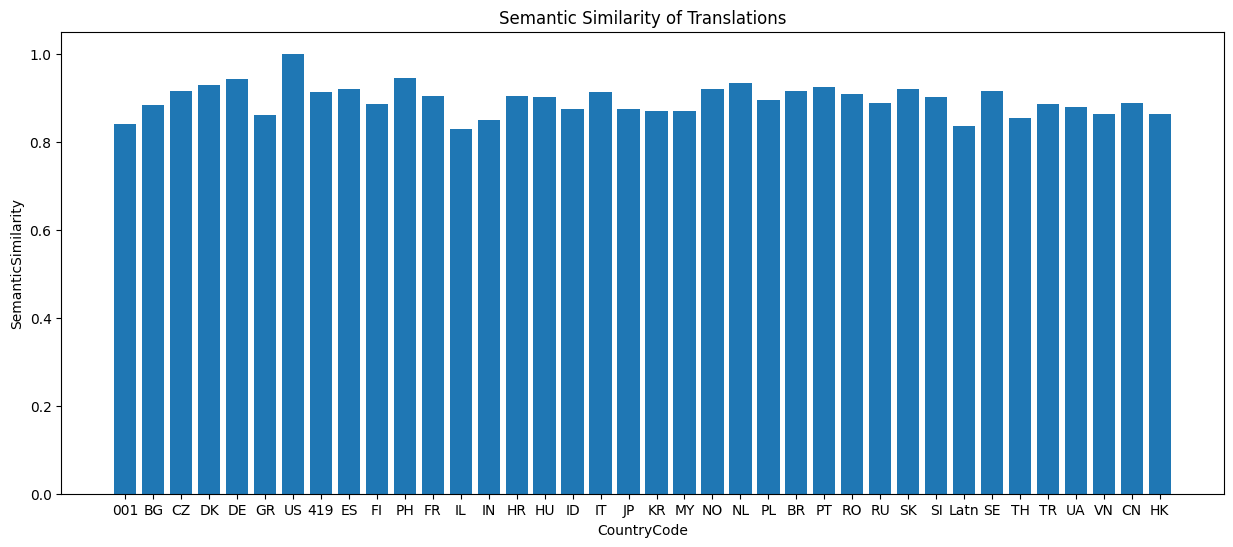

In [12]:
# Visualisierung der Similarity
plt.figure(figsize=(15, 6))
plt.bar(results_df['CountryCode'], results_df['SemanticSimilarity'])
plt.title('Semantic Similarity of Translations')
plt.xlabel('CountryCode')
plt.ylabel('SemanticSimilarity')
plt.show()

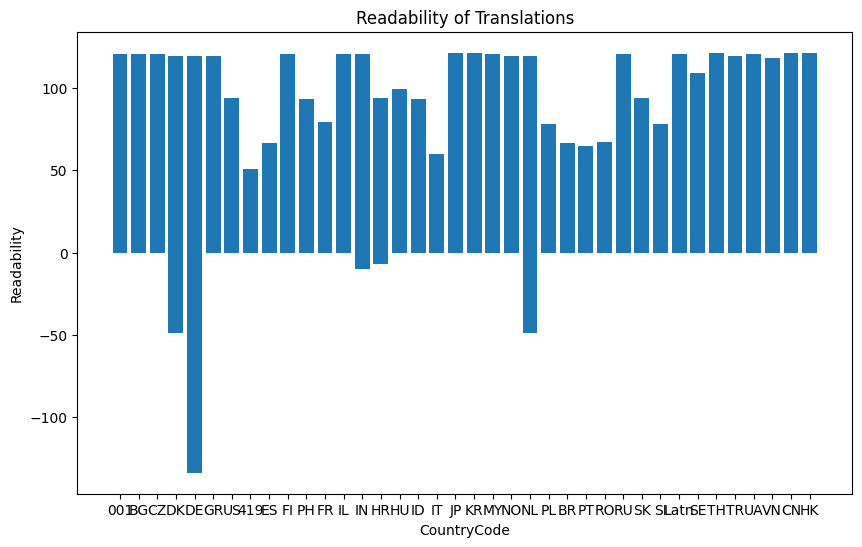

In [13]:
# Visualisierung der Ergebnisse - Lesbarkeit
plt.figure(figsize=(10, 6))
plt.bar(results_df['CountryCode'], results_df['Readability'])
plt.title('Readability of Translations')
plt.xlabel('CountryCode')
plt.ylabel('Readability')
plt.show()